<a href="https://colab.research.google.com/github/Gaethje/predict-crypto-price/blob/main/btc_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as web
import datetime as dt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense,Dropout,LSTM
from tensorflow.keras.models import Sequential

In [45]:
#data collected from two sources- yahoo finance and kaggle.
#kaggle data source provides minute data the time period of Jan 2012 to December March 2021, with minute to minute updates of OHLC (Open, High, Low, Close)
#yahoo finance eprovides daily data start date sept 17, 2014; end date 23 oct 2021 

In [46]:
# Preparing data

In [78]:
url = 'https://raw.githubusercontent.com/Gaethje/predict-crypto-price/main/BTC-USD%20(1).csv'
df1 = pd.read_csv(url)

In [79]:
df1.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-01,$430.72,$436.25,$427.52,$434.33,$434.33,"$36,278,900.00"
1,2016-01-02,$434.62,$436.06,$431.87,$433.44,$433.44,"$30,096,600.00"
2,2016-01-03,$433.58,$433.74,$424.71,$430.01,$430.01,"$39,633,800.00"
3,2016-01-04,$430.06,$434.52,$429.08,$433.09,$433.09,"$38,477,500.00"
4,2016-01-05,$433.07,$434.18,$429.68,$431.96,$431.96,"$34,522,600.00"


In [80]:
df1.describe()

,Open,High,Low,Close,Adj Close,Volume
count,"$2,119.00","$2,119.00","$2,119.00","$2,119.00","$2,119.00","$2,119.00"
mean,"$11,600.21","$11,930.20","$11,247.56","$11,627.52","$11,627.52","$16,851,868,544.84"
std,"$14,745.73","$15,190.15","$14,257.82","$14,780.81","$14,780.81","$20,803,611,692.76"
min,$365.07,$374.95,$354.91,$364.33,$364.33,"$28,514,000.00"
25%,"$2,457.91","$2,538.54","$2,336.91","$2,471.52","$2,471.52","$1,054,235,008.00"
50%,"$7,203.51","$7,363.53","$7,031.28","$7,207.76","$7,207.76","$7,764,460,032.00"
75%,"$10,750.21","$11,002.92","$10,437.51","$10,758.83","$10,758.83","$26,461,817,774.00"
max,"$66,002.23","$66,930.39","$63,610.68","$65,992.84","$65,992.84","$350,967,941,479.00"


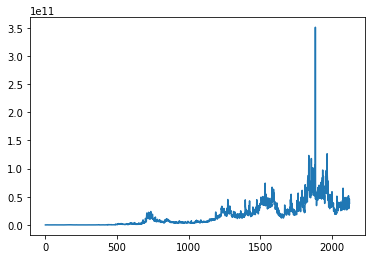

In [81]:
df1['Volume'].plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb6ec41fe10>,
      dtype=object)

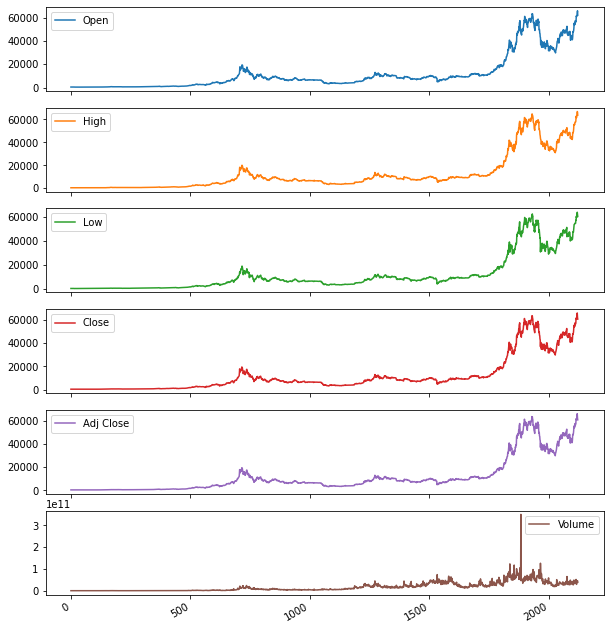

In [82]:
df1.plot(subplots=True, figsize=(10,12))

In [83]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df1['Close'].values.reshape(-1,1))
scaled_data

array([[0.00106666],
       [0.001053  ],
       [0.00100078],
       ...,
       [0.91923372],
       [       nan],
       [0.92637393]])

In [84]:
#train 60 days and predict 61th day
prediction_days = 60
x_train,y_train = [],[]


In [85]:
for x in range(prediction_days, len(scaled_data)):
  x_train.append(scaled_data[x-prediction_days:x, 0])
  y_train.append(scaled_data[x, 0])

In [86]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))


In [87]:
 # create neural network

In [88]:
 model = Sequential()
 model.add(LSTM(units=50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
 model.add(Dropout(0.2))
 model.add(LSTM(units=50, return_sequences=True))
 model.add(Dropout(0.2))
 model.add(LSTM(units=50))
 model.add(Dense(units=1))

 model.compile(optimizer='adam', loss='mean_squared_error')
 model.fit(x_train,y_train, epochs = 25, batch_size = 32)
  

Epoch 1/25
65/65 [==============================] - 11s 92ms/step - loss: nan
Epoch 2/25
65/65 [==============================] - 6s 95ms/step - loss: nan
Epoch 3/25
65/65 [==============================] - 6s 94ms/step - loss: nan
Epoch 4/25
65/65 [==============================] - 6s 92ms/step - loss: nan
Epoch 5/25
65/65 [==============================] - 6s 93ms/step - loss: nan
Epoch 6/25
65/65 [==============================] - 6s 94ms/step - loss: nan
Epoch 7/25
65/65 [==============================] - 6s 93ms/step - loss: nan
Epoch 8/25
65/65 [==============================] - 6s 93ms/step - loss: nan
Epoch 9/25
65/65 [==============================] - 6s 92ms/step - loss: nan
Epoch 10/25
65/65 [==============================] - 6s 92ms/step - loss: nan
Epoch 11/25
65/65 [==============================] - 6s 93ms/step - loss: nan
Epoch 12/25
65/65 [==============================] - 6s 92ms/step - loss: nan
Epoch 13/25
65/65 [==============================] - 6s 93ms/step - loss

In [89]:
# testing the model
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
dropout_4 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_5 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
__________________________________________________

In [90]:
df1

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-01,$430.72,$436.25,$427.52,$434.33,$434.33,"$36,278,900.00"
1,2016-01-02,$434.62,$436.06,$431.87,$433.44,$433.44,"$30,096,600.00"
2,2016-01-03,$433.58,$433.74,$424.71,$430.01,$430.01,"$39,633,800.00"
3,2016-01-04,$430.06,$434.52,$429.08,$433.09,$433.09,"$38,477,500.00"
4,2016-01-05,$433.07,$434.18,$429.68,$431.96,$431.96,"$34,522,600.00"
...,...,...,...,...,...,...,...
2119,2021-10-20,"$64,284.59","$66,930.39","$63,610.68","$65,992.84","$65,992.84","$40,788,955,582.00"
2120,2021-10-21,"$66,002.23","$66,600.55","$62,117.41","$62,210.17","$62,210.17","$45,908,121,370.00"
2121,2021-10-22,"$62,237.89","$63,715.02","$60,122.80","$60,692.27","$60,692.27","$38,434,082,775.00"
2122,2021-10-23,$nan,$nan,$nan,$nan,$nan,$nan


In [91]:
df2 = df1[-400:]
df2.head()

,Date,Open,High,Low,Close,Adj Close,Volume
1724,2020-09-20,"$11,095.87","$11,095.87","$10,814.48","$10,938.27","$10,938.27","$24,699,523,788.00"
1725,2020-09-21,"$10,934.93","$10,988.30","$10,380.26","$10,462.26","$10,462.26","$28,884,999,244.00"
1726,2020-09-22,"$10,459.62","$10,568.08","$10,382.73","$10,538.46","$10,538.46","$23,621,787,804.00"
1727,2020-09-23,"$10,539.46","$10,637.85","$10,185.77","$10,225.86","$10,225.86","$22,986,733,997.00"
1728,2020-09-24,"$10,227.48","$10,765.79","$10,215.21","$10,745.55","$10,745.55","$23,017,536,742.00"


In [92]:
actual_prices = df2['Close'].values
#print(actual_prices)
total_dataset = pd.concat((df1['Close'], df2['Close']), axis=0)

model_inputs = total_dataset[len(total_dataset) - len(df2) - prediction_days: ].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.fit_transform(model_inputs)


In [94]:
x_test = []

for x in range(prediction_days, len(model_inputs)):
  x_test.append(model_inputs[x-prediction_days:x, 0])


x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
prediction_prices = model.predict(x_test)
#print(prediction_prices)
prediction_prices = scaler.inverse_transform(prediction_prices)

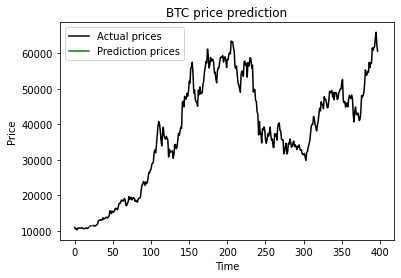

In [95]:
plt.plot(actual_prices, color='black', label='Actual prices')
plt.plot(prediction_prices, color='green', label='Prediction prices')
plt.title(f'{crypto_currency} price prediction' )
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.show()